In [1]:
import tensorflow as tf
import os

In [2]:
import cv2
import imghdr
import matplotlib.pyplot as plt

In [3]:
data_dir = 'ImageClassification/data/'

In [4]:
image_exts = ['jpeg','jpg','bmp','png']

In [5]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image{}'.format(image_path))
                

In [6]:
tf.data.Dataset??

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
data = tf.keras.utils.image_dataset_from_directory('ImageClassification/data/')

Found 305 files belonging to 2 classes.


In [9]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [10]:
data_iterator = data.as_numpy_iterator()

In [11]:
data_iterator

In [12]:
batch = data_iterator.next()

In [14]:
tf.keras.utils.image_dataset_from_directory??

In [15]:
batch[1]

array([1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 0])

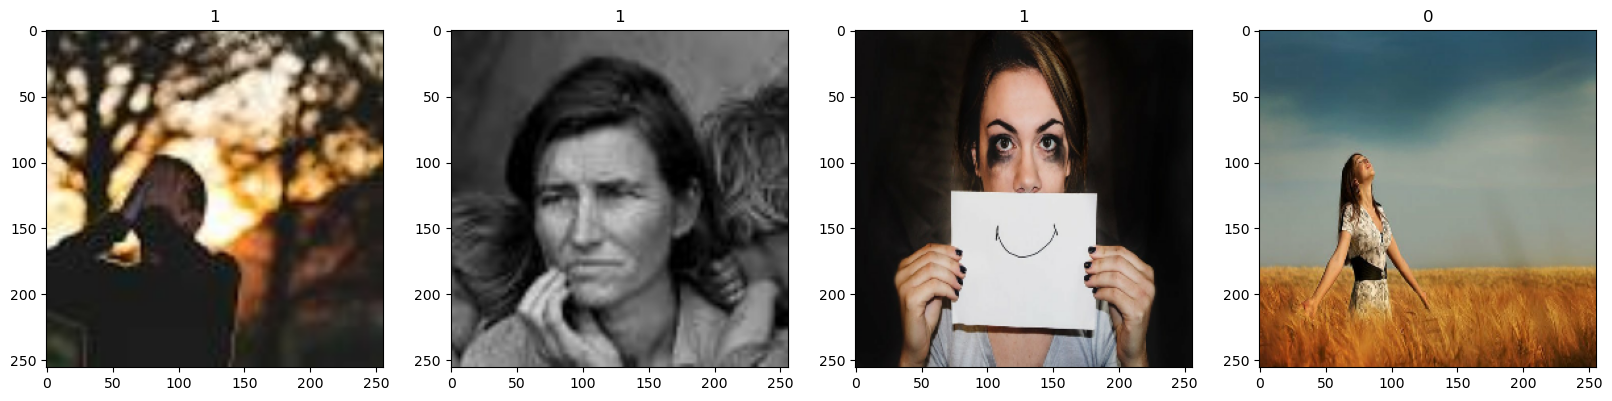

In [16]:
fig,ax = plt.subplots(ncols=4,figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [17]:
scaled = batch[0]/255

In [19]:
scaled.max()

1.0

In [20]:
data = data.map(lambda x,y:(x/255,y))

In [26]:
scaled_iterator = data.as_numpy_iterator()

In [27]:
scaled_iterator.next()[0].max()

1.0

In [32]:
len(data)

10

In [33]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [35]:
train_size = val_size+test_size

In [36]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [37]:
len(test)

2

In [38]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout

In [39]:
model = Sequential()

In [40]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

In [45]:
model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

In [46]:
model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

In [47]:
model.add(Flatten())

In [48]:
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [49]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [51]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [52]:
logdir = 'logs'

In [54]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [55]:
hist = model.fit(train,epochs = 20,validation_data=val,callbacks = [tensorboard_callback])

Epoch 1/20
5/5 [==============================] - 9s 1s/step - loss: 1.0722 - accuracy: 0.4812 - val_loss: 0.6824 - val_accuracy: 0.5521
Epoch 2/20
5/5 [==============================] - 6s 1s/step - loss: 0.6962 - accuracy: 0.5063 - val_loss: 0.6755 - val_accuracy: 0.6042
Epoch 3/20
5/5 [==============================] - 6s 1s/step - loss: 0.6253 - accuracy: 0.6438 - val_loss: 0.5932 - val_accuracy: 0.7396
Epoch 4/20
5/5 [==============================] - 7s 1s/step - loss: 0.5645 - accuracy: 0.7688 - val_loss: 0.4915 - val_accuracy: 0.7083
Epoch 5/20
5/5 [==============================] - 7s 1s/step - loss: 0.4851 - accuracy: 0.7750 - val_loss: 0.5293 - val_accuracy: 0.7083
Epoch 6/20
5/5 [==============================] - 7s 1s/step - loss: 0.4060 - accuracy: 0.8250 - val_loss: 0.3633 - val_accuracy: 0.8333
Epoch 7/20
5/5 [==============================] - 7s 1s/step - loss: 0.3384 - accuracy: 0.8687 - val_loss: 0.2791 - val_accuracy: 0.9167
Epoch 8/20
5/5 [=========================

In [56]:
hist.history

{'loss': [1.0721867084503174,
  0.6961681842803955,
  0.6253253221511841,
  0.5645377039909363,
  0.4850941598415375,
  0.4060259461402893,
  0.33842790126800537,
  0.30218178033828735,
  0.2423243522644043,
  0.16760988533496857,
  0.1385166496038437,
  0.16997987031936646,
  0.12990765273571014,
  0.10176557302474976,
  0.06802434474229813,
  0.031018933281302452,
  0.047904711216688156,
  0.039331402629613876,
  0.024342689663171768,
  0.049271631985902786],
 'accuracy': [0.48124998807907104,
  0.5062500238418579,
  0.643750011920929,
  0.768750011920929,
  0.7749999761581421,
  0.824999988079071,
  0.8687499761581421,
  0.893750011920929,
  0.918749988079071,
  0.949999988079071,
  0.981249988079071,
  0.9312499761581421,
  0.9624999761581421,
  0.987500011920929,
  0.987500011920929,
  0.9937499761581421,
  0.9937499761581421,
  0.987500011920929,
  0.9937499761581421,
  0.981249988079071],
 'val_loss': [0.6824482083320618,
  0.6755296587944031,
  0.5932316184043884,
  0.491469532

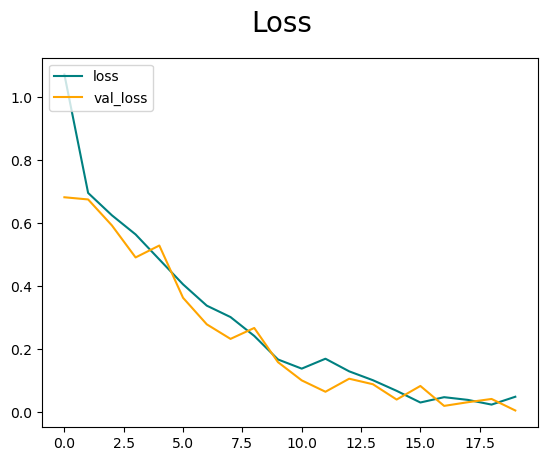

In [58]:
fig = plt.figure()
plt.plot(hist.history['loss'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

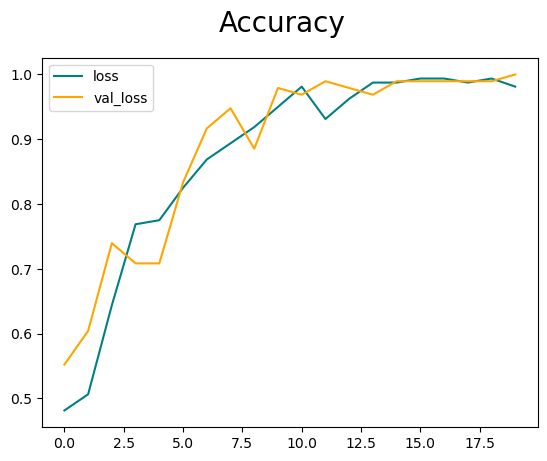

In [60]:
fig = plt.figure()
plt.plot(hist.history['accuracy'],color = 'teal',label = 'loss')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_loss')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [61]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [62]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [63]:
for batch in test.as_numpy_iterator():
    X,y = batch
    yhat = model.predict(X)
    pre.update_state(y,yhat)
    re.update_state(y,yhat)
    acc.update_state(y,yhat)

1/1 [==============================] - 0s 146ms/step


In [64]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()},Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0,Accuracy:1.0


In [65]:
import cv2

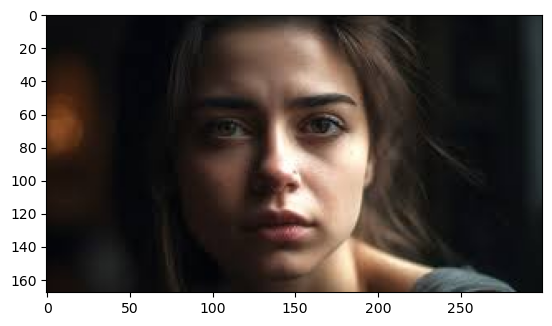

In [75]:
img = cv2.imread('sadim.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


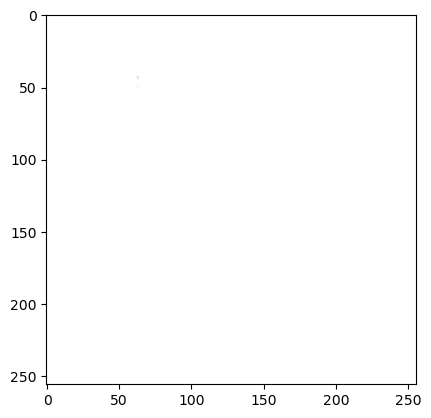

In [76]:
resize = tf.image.resize(img,(256,256))
plt.imshow(cv2.cvtColor(resize.numpy(),cv2.COLOR_BGR2RGB))
plt.show()

In [71]:
np.expand_dims(resize,0)

array([[[[220.       , 222.       , 222.       ],
         [220.25781  , 222.25781  , 222.25781  ],
         [221.42969  , 223.42969  , 223.42969  ],
         ...,
         [148.98438  , 158.125    , 246.42188  ],
         [170.58594  , 181.32812  , 253.45312  ],
         [189.71094  , 199.79688  , 255.       ]],

        [[220.       , 222.       , 222.       ],
         [220.25781  , 222.25781  , 222.25781  ],
         [221.42969  , 223.42969  , 223.42969  ],
         ...,
         [156.59814  , 166.29126  , 246.07751  ],
         [175.2102   , 187.28064  , 251.76538  ],
         [191.81494  , 203.79675  , 253.0625   ]],

        [[220.01208  , 222.01208  , 222.01208  ],
         [220.36218  , 222.36218  , 222.36218  ],
         [221.49011  , 223.49011  , 223.49011  ],
         ...,
         [166.85315  , 177.47607  , 245.63074  ],
         [181.47534  , 195.1366   , 249.41064  ],
         [194.15137  , 208.54907  , 250.16833  ]],

        ...,

        [[233.21448  , 235.21448  , 23

In [77]:
resize.shape

TensorShape([256, 256, 3])

In [78]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 49ms/step


In [79]:
yhat

array([[0.9999991]], dtype=float32)

In [80]:
from tensorflow.keras.models import load_model

In [82]:
new_model = model.save(os.path.join('models','happysadmodel.h5'))

In [84]:
ne_model = load_model(os.path.join('models','happysadmodel.h5'))

In [85]:
yhatnew = ne_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 135ms/step


In [86]:
if yhatnew > 0.5:
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Sad
